In [65]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix

# 데이터 로딩
file_path = "C:/Users/Admin/Desktop/20251학기 공부/인공지능개론/week4/wine.csv"

df = pd.read_csv(file_path)

print(df)
print(df.columns)

     Wine  Alcohol  Malic.acid   Ash   Acl   Mg  Phenols  Flavanoids  \
0       1    14.23        1.71  2.43  15.6  127     2.80        3.06   
1       1    13.20        1.78  2.14  11.2  100     2.65        2.76   
2       1    13.16        2.36  2.67  18.6  101     2.80        3.24   
3       1    14.37        1.95  2.50  16.8  113     3.85        3.49   
4       1    13.24        2.59  2.87  21.0  118     2.80        2.69   
..    ...      ...         ...   ...   ...  ...      ...         ...   
173     3    13.71        5.65  2.45  20.5   95     1.68        0.61   
174     3    13.40        3.91  2.48  23.0  102     1.80        0.75   
175     3    13.27        4.28  2.26  20.0  120     1.59        0.69   
176     3    13.17        2.59  2.37  20.0  120     1.65        0.68   
177     3    14.13        4.10  2.74  24.5   96     2.05        0.76   

     Nonflavanoid.phenols  Proanth  Color.int   Hue    OD  Proline  
0                    0.28     2.29       5.64  1.04  3.92     1065

In [67]:
# 결측치 확인
df.isnull().sum()

Wine                    0
Alcohol                 0
Malic.acid              0
Ash                     0
Acl                     0
Mg                      0
Phenols                 0
Flavanoids              0
Nonflavanoid.phenols    0
Proanth                 0
Color.int               0
Hue                     0
OD                      0
Proline                 0
dtype: int64

In [69]:
# 레이블 확인
print(df['Wine'].value_counts())

Wine
2    71
1    59
3    48
Name: count, dtype: int64


In [71]:
# 타겟 변수와 독립 변수 분리
X = df.drop('Wine', axis=1).values
y = df['Wine'].values

In [73]:
from sklearn.preprocessing import StandardScaler

#Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)


# 훈련용 데이터와 테스트용 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [75]:
X_train.shape,X_test.shape, y_train.shape,y_test.shape

((124, 13), (54, 13), (124,), (54,))

In [77]:
from sklearn.tree import DecisionTreeClassifier

# DT 모델 생성
dt_model = DecisionTreeClassifier(random_state=42)

# 모델 학습
dt_model.fit(X_train, y_train)

# 예측
y_pred = dt_model.predict(X_test)

# 정확도 확인
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# 혼동 행렬 확인
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Accuracy: 96.30%
Confusion Matrix:
[[18  1  0]
 [ 0 21  0]
 [ 1  0 13]]


In [79]:
from sklearn.linear_model import LogisticRegression

# LR모델 생성
lr_model = LogisticRegression(max_iter=1000, random_state=42)

# 모델 학습
lr_model.fit(X_train, y_train)

# 예측
y_pred_lr = lr_model.predict(X_test)

# 정확도 출력
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Accuracy: {accuracy_lr * 100:.2f}%")

# 혼동 행렬 계산 및 출력
cm_lr = confusion_matrix(y_test, y_pred_lr)
print("Confusion Matrix:")
print(cm_lr)

Accuracy: 98.15%
Confusion Matrix:
[[19  0  0]
 [ 0 20  1]
 [ 0  0 14]]


In [81]:
from sklearn.svm import SVC

# SVM모델 생성 (커널은 RBF 사용)
svm_model = SVC(kernel='rbf', random_state=42)

# 모델 학습
svm_model.fit(X_train, y_train)

# 예측
y_pred_svm = svm_model.predict(X_test)

# 정확도 출력
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy: {accuracy_svm * 100:.2f}%")

# 혼동 행렬 계산 및 출력
cm_svm = confusion_matrix(y_test, y_pred_svm)
print("Confusion Matrix:")
print(cm_svm)

Accuracy: 98.15%
Confusion Matrix:
[[19  0  0]
 [ 0 21  0]
 [ 0  1 13]]


In [83]:
from sklearn.neighbors import KNeighborsClassifier

# KNN모델 생성
knn_model = KNeighborsClassifier(n_neighbors=5)

# 모델 학습
knn_model.fit(X_train, y_train)

# 예측
y_pred_knn = knn_model.predict(X_test)

# 정확도 출력
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy: {accuracy_knn * 100:.2f}%")

# 혼동 행렬 계산 및 출력
cm_knn = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix:")
print(cm_knn)

Accuracy: 96.30%
Confusion Matrix:
[[19  0  0]
 [ 1 19  1]
 [ 0  0 14]]


In [85]:
from sklearn.ensemble import RandomForestClassifier

# RF모델 생성 (n_estimators: 트리 개수 설정)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# 모델 학습
rf_model.fit(X_train, y_train)

# 예측
y_pred_rf = rf_model.predict(X_test)

# 정확도 출력
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy_rf * 100:.2f}%")

# 혼동 행렬 계산
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:")
print(cm_rf)

Accuracy: 100.00%
Confusion Matrix:
[[19  0  0]
 [ 0 21  0]
 [ 0  0 14]]


In [99]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

Y = pd.get_dummies(y).values

X = X

# 데이터 분할
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# 정규화
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [105]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# 모델 생성
model = Sequential([
    Dense(64, input_shape=(13,), activation='relu'),  # 첫 번째 은닉층 (뉴런 수 증가)
    Dense(32, activation='relu'),  # 두 번째 은닉층
    Dense(16, activation='relu'),  # 세 번째 은닉층
    Dense(3, activation='softmax')  # 출력층 (3개의 클래스 분류)
])

# 모델 컴파일
model.compile(optimizer=Adam(learning_rate=0.003),  # 학습률 조정
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 모델 요약 출력
model.summary()


C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 64)             │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,555 (13.89 KB)

 Trainable params: 3,555 (13.89 KB)

 Non-trainable params: 0 (0.00 B)

In [107]:
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np

# 모델 학습 (조기 종료 콜백 추가)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping]  # 학습 조기 종료 옵션 추가
)

# 모델 예측
y_prob = model.predict(X_test)  # softmax 확률값 출력

# 실제 정답 라벨 (원-핫 인코딩 → 정수 변환)
y_true = np.argmax(y_test, axis=1)

# 예측된 라벨 (확률값 중 최댓값의 인덱스 선택)
y_pred = np.argmax(y_prob, axis=1)


Epoch 1/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.4785 - loss: 1.0069 - val_accuracy: 0.8611 - val_loss: 0.7881
Epoch 2/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9170 - loss: 0.7118 - val_accuracy: 0.8889 - val_loss: 0.5570
Epoch 3/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9450 - loss: 0.4728 - val_accuracy: 0.9444 - val_loss: 0.3487
Epoch 4/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9687 - loss: 0.2769 - val_accuracy: 0.9722 - val_loss: 0.2050
Epoch 5/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9700 - loss: 0.1567 - val_accuracy: 0.9722 - val_loss: 0.1342
Epoch 6/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9884 - loss: 0.0982 - val_accuracy: 1.0000 - val_loss: 0.0754
Epoch 7/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9868 - loss: 0.0564 - val_accuracy: 1.0000 - val_loss: 0.0431
Epoch 8/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 1.0000 - loss: 0.0386 - val_accuracy: 1.0000 - val_loss: 0.0331


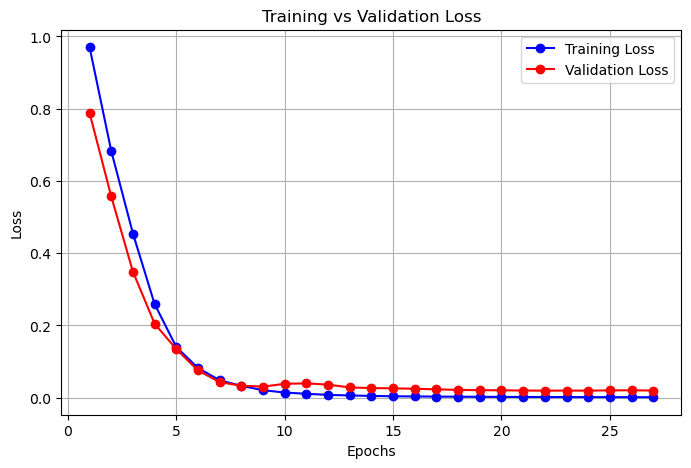

In [109]:
import matplotlib.pyplot as plt

# 학습 및 검증 손실 값 가져오기
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)

# 그래프 그리기
plt.figure(figsize=(8, 5))
plt.plot(epochs, train_loss, 'bo-', label='Training Loss')  # 훈련 손실 (파란색 원형 마커)
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')  # 검증 손실 (빨간색 원형 마커)

plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


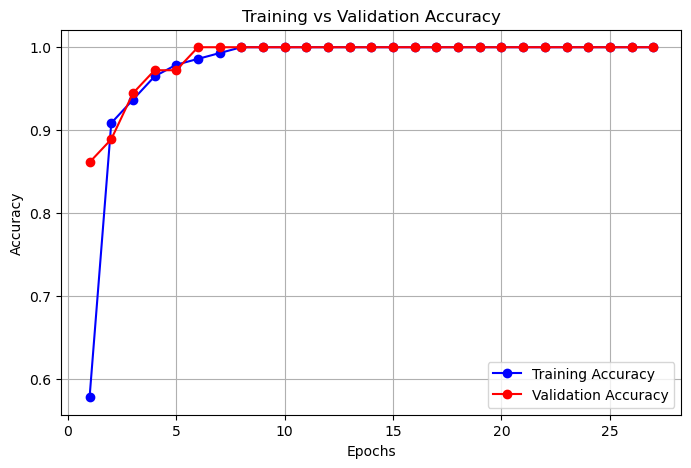

In [111]:
import matplotlib.pyplot as plt

# 학습 및 검증 정확도 가져오기
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(train_acc) + 1)

# 그래프 그리기
plt.figure(figsize=(8, 5))
plt.plot(epochs, train_acc, 'bo-', label='Training Accuracy')  # 훈련 정확도 (파란색 원형 마커)
plt.plot(epochs, val_acc, 'ro-', label='Validation Accuracy')  # 검증 정확도 (빨간색 원형 마커)

plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()
